# Zomato Veriseti 

Zomato veriseti, restoranlarla ilgili çeşitli bilgileri içeren popüler bir veri kümesidir. Genellikle restoranların fiyat aralığı, kullanıcı puanları ve yorumları gibi bilgileri içerir. Bu veriseti, makine öğrenimi ve veri analizi projelerinde restoran puan tahmini, müşteri eğilimlerini analiz etme ve öneri sistemleri geliştirme gibi amaçlarla kullanılır.

## Sütun adları : 
1. **name** : Restoranın adı (örn: Jalsa, Spice Elephant).

2. **online_order**: Restoranın online sipariş kabul edip etmediğini gösterir (Yes = Evet, No = Hayır).

3. **book_table**: Restoranda masa rezervasyonu yapılıp yapılamayacağını gösterir (Yes = Evet, No = Hayır).

4. **rate**: Restoranın müşteri puanı (X/5 formatında, örn: 4.1/5).

5. **votes**: Restoranın aldığı toplam oy sayısı (örn: 775, 787).

6. **approx_cost(for two people)**: İki kişi için ortalama yemek maliyeti (örn: 800, 300).

7. **listed_in(type)**: Restoranın hizmet türü veya kategorisi (örn: Buffet).


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("zomato.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Kolon adlarını daha açıklayıcı ve veri setini özetleyecek şekilde düzenliyoruz

In [41]:
df.rename(columns={'approx_cost(for two people)': 'approx_cost'}, inplace=True)
df.rename(columns={'listed_in(type)': 'restoran_type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,approx_cost,restoran_type
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


 İlk olarak verisetinde rate kolonu object tipinde tutulmuş fakat yapacağımız analizler sırasında bu veri tipi ile işlem yapamayacağımız için bu kolonu float tipine dönüştürmemiz gerekiyor ve sonundaki '/5' ifadesini kaldırmamız gerekiyor

In [42]:
df['rate'] = df['rate'].str.replace('/5', '').astype(float)

In [43]:
df['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

'online_order' ve 'book_table' kolonları boolean değerler tutmalarına rağmen str türünde oluşturulmuşlar. Bunları yapacağımız işlemler açısından boolean tipine dönüştürmemiz gerekir.

In [44]:
df['online_order'] = df['online_order'].map({'Yes': True,
                                             'No': False})
df['book_table'] = df['book_table'].map({'Yes': True,
                                             'No': False})
df.head()

,name,online_order,book_table,rate,votes,approx_cost,restoran_type
0,Jalsa,True,True,4.1,775,800,Buffet
1,Spice Elephant,True,False,4.1,787,800,Buffet
2,San Churro Cafe,True,False,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,False,False,3.7,88,300,Buffet
4,Grand Village,False,False,3.8,166,600,Buffet


# Veri Görselleştirme

## Halkın en çok tercih ettiği restoran türleri hangileridir?

C:\Users\dilar\AppData\Local\Temp\ipykernel_3768\3882974930.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['restoran_type'], palette = 'Set2')


Text(0.5, 0, 'Restoran Türleri')

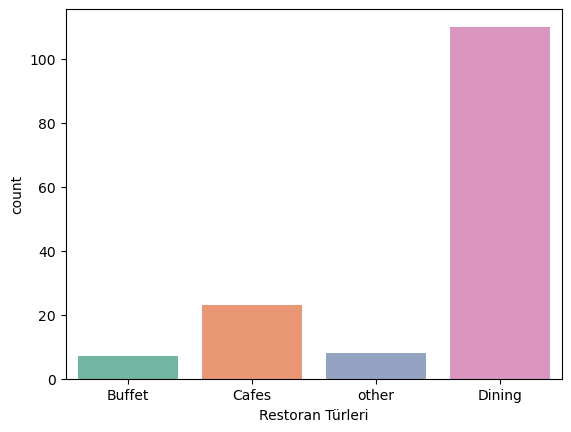

In [53]:
sns.countplot(x = df['restoran_type'], palette = 'Set2')
plt.xlabel('Restoran Türleri')

Bu grafikte görüldüğü gibi restoranların büyük bir çoğunlu 'dining' türündedir.

Text(0, 0.5, 'Aldıkları Oylar')

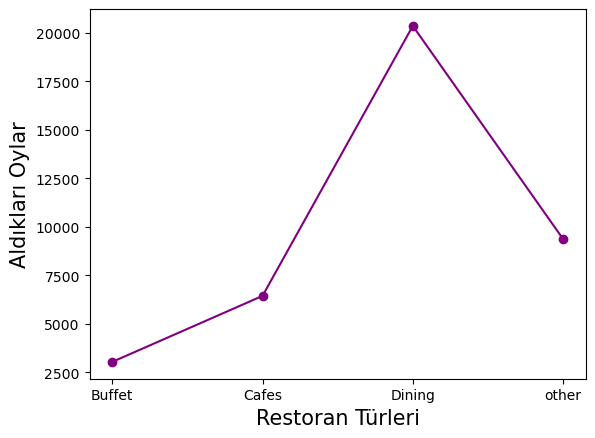

In [65]:
grouped_data = df.groupby('restoran_type')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c= 'purple', marker ='o')
plt.xlabel('Restoran Türleri', c='black', size=15)
plt.ylabel('Aldıkları Oylar', c='black', size=15)

Bu grafikte görüldüğü gibi en çok oy alan restoran tipi 'dining' türüdür. Bu da bu restoran türünün daha çok insan tarafından tercih edildiği anlamına gelmektedir.


In [71]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes']==max_votes,'name']
print("En çok oy alan restoran ")
print("Oy Sayısı :  ", restaurant_with_max_votes)


En çok oy alan restoran 
Oy Sayısı :   38    Empire Restaurant
Name: name, dtype: object


## Daha fazla sayıda restoran çevrimdışı hizmetlere kıyasla çevrimiçi teslimat hizmeti sunuyor mu?

C:\Users\dilar\AppData\Local\Temp\ipykernel_3768\642700758.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['online_order'], palette = 'Set2')


Text(0.5, 0, 'Restoran Türleri')

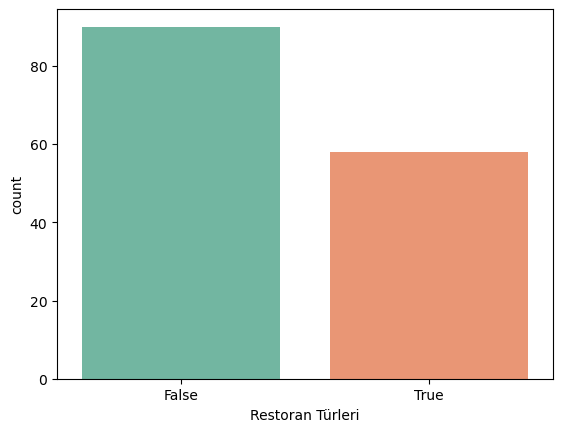

In [75]:
sns.countplot(x = df['online_order'], palette = 'Set2')
plt.xlabel('Restoran Türleri')

Bu grafik restoranların büyük bir çoğunluğunun online sipariş kabul etmediğini göstermektedir.

In [77]:
df['rate'].value_counts()

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

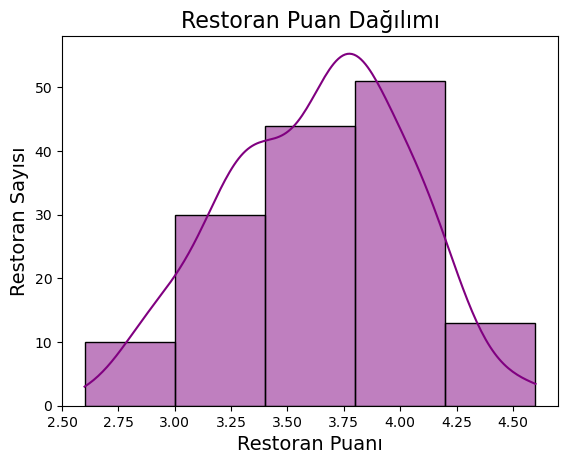

In [80]:
sns.histplot(df['rate'], bins=5,kde=True,color='purple')
plt.xlabel('Restoran Puanı', fontsize=14)
plt.ylabel('Restoran Sayısı', fontsize=14)
plt.title('Restoran Puan Dağılımı', fontsize=16)
plt.show()

Bu grafikten restoranların büyük bir çoğunluğunun 3,5-4,00 aralığında puan aldığını görüyoruz.

## Çiftler restoranlarda akşam yemeği için hangi fiyat aralığını tercih ediyor?

C:\Users\dilar\AppData\Local\Temp\ipykernel_3768\3011193151.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['approx_cost'], palette = 'Set2')


Text(0.5, 0, 'Restoran Türleri')

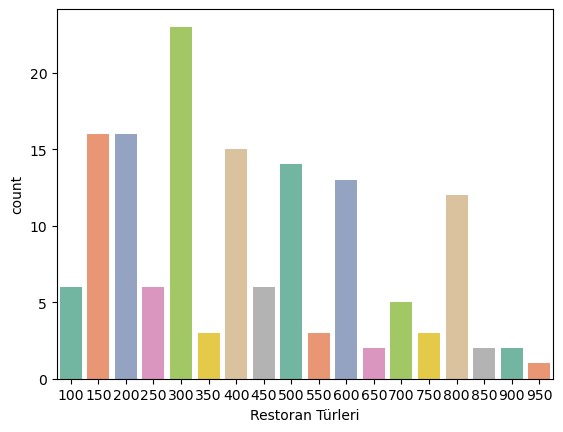

In [84]:
sns.countplot(x = df['approx_cost'], palette = 'Set2')
plt.xlabel('Restoran Türleri')

Genellikle iki kişilik ortalama 300 birimlik bir yemek maliyeti olan restoranların daha çok tercih edildiği görülmektedir

## Online siparişler mekanda yenilenlere göre daha yüksek puan mı alıyor yoksa daha düşük mü ?

C:\Users\dilar\AppData\Local\Temp\ipykernel_3768\4071869579.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df,palette = 'Set2')


<Axes: xlabel='online_order', ylabel='rate'>

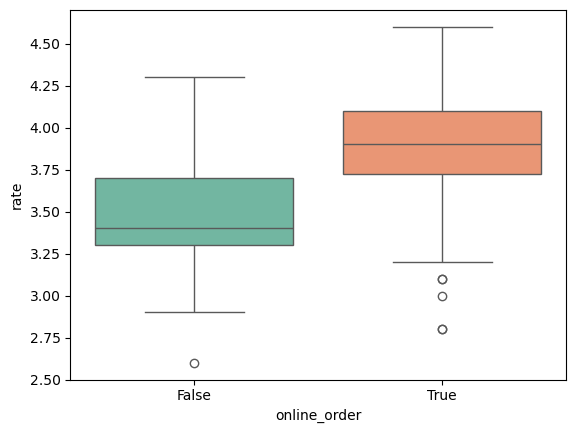

In [86]:
sns.boxplot(x='online_order', y='rate', data=df,palette = 'Set2')

Online siparişlerin, online olmayanlardan daha yğksek puanalr aldığı görülmektedir.

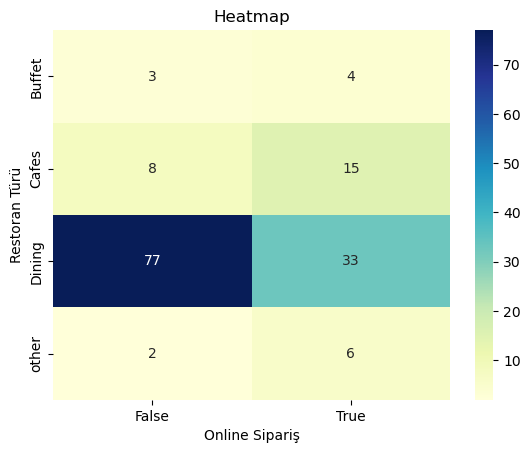

In [89]:
pivot_table = df.pivot_table(index='restoran_type',
columns = 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Sipariş')
plt.ylabel('Restoran Türü')
plt.show()

Yemek restoranları öncelikli olarak çevrimdışı siparişleri kabul ederken, kafeler öncelikli olarak çevrimiçi siparişler alır. Bu, müşterilerin restoranlarda şahsen sipariş vermeyi tercih ettiğini, ancak kafelerde çevrimiçi sipariş vermeyi tercih ettiğini göstermektedir.